SNR=-5dB


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
100%|██████████| 5/5 [00:30<00:00,  6.20s/it]


SNR=-4dB


100%|██████████| 5/5 [00:30<00:00,  6.06s/it]


SNR=-3dB


100%|██████████| 5/5 [00:30<00:00,  6.12s/it]


SNR=-2dB


100%|██████████| 5/5 [00:30<00:00,  6.06s/it]


SNR=-1dB


100%|██████████| 5/5 [00:30<00:00,  6.13s/it]


SNR=0dB


100%|██████████| 5/5 [00:30<00:00,  6.17s/it]


SNR=1dB


100%|██████████| 5/5 [00:31<00:00,  6.23s/it]


SNR=2dB


100%|██████████| 5/5 [00:31<00:00,  6.25s/it]


SNR=3dB


100%|██████████| 5/5 [00:33<00:00,  6.68s/it]


SNR=4dB


100%|██████████| 5/5 [00:34<00:00,  6.99s/it]


SNR=-5dB


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


SNR=-4dB


100%|██████████| 5/5 [00:02<00:00,  2.14it/s]


SNR=-3dB


100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


SNR=-2dB


100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


SNR=-1dB


100%|██████████| 5/5 [00:02<00:00,  2.08it/s]


SNR=0dB


100%|██████████| 5/5 [00:02<00:00,  2.17it/s]


SNR=1dB


100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


SNR=2dB


100%|██████████| 5/5 [00:02<00:00,  2.14it/s]


SNR=3dB


100%|██████████| 5/5 [00:02<00:00,  2.14it/s]


SNR=4dB


100%|██████████| 5/5 [00:02<00:00,  2.16it/s]


SNR=-5dB


100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


SNR=-4dB


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


SNR=-3dB


100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


SNR=-2dB


100%|██████████| 5/5 [00:02<00:00,  2.08it/s]


SNR=-1dB


100%|██████████| 5/5 [00:02<00:00,  2.04it/s]


SNR=0dB


100%|██████████| 5/5 [00:02<00:00,  2.02it/s]


SNR=1dB


100%|██████████| 5/5 [00:02<00:00,  1.92it/s]


SNR=2dB


100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


SNR=3dB


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


SNR=4dB


100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


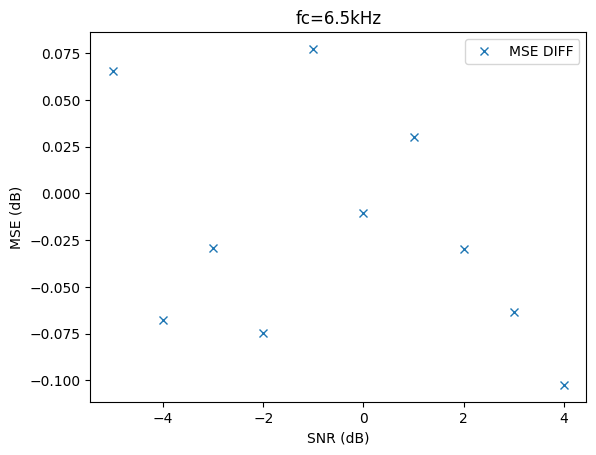

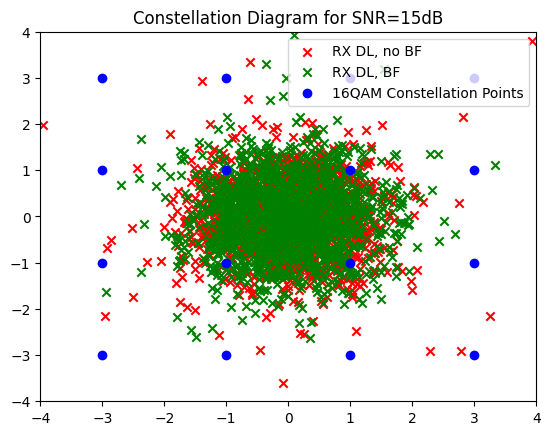

In [1]:
from bf_multichannel_const import bf_multichannel_const
import numpy as np
import matplotlib.pyplot as plt
from downlink import downlink

fc = 6.5e3

My_bf = bf_multichannel_const(6.5e3, 2, 5, 1)
# rx at (0,0)
# tx_1 at (5,5) with a wall at x=10
# after relection, tx_2 at (15,5)
My_bf.reflection_list = np.array([1,0.5])
My_bf.x_tx_list = np.array([5,15])
My_bf.y_tx_list = np.array([5,5])

theta_bf = My_bf.simulation() #3*np.pi/4 #pos 45 degree angle?

My_ue_nobf = downlink(6.5e3, 1, 5, theta=theta_bf, apply_bf=False)
# do not assume independence
My_ue_nobf.reflection_list = np.array([1,0.5]) # this shouldn't play a part
#My_ue.x_tx_list = np.array([5,15]) #shouldn't need to touch gnb location
#My_ue.y_tx_list = np.array([5,5]) #shouldn't need to touch gnb location
#My_bf.reflection_list = np.array([1,0.5])
My_ue_nobf.x_rx_list = np.array([5,15])
My_ue_nobf.y_rx_list = np.array([5,5])
My_ue_nobf.simulation()
mse_no_bf = My_ue_nobf.mean_mse
symbolset_no_bf = My_ue_nobf.mean_symbols[-1,:]

true_sym = np.reshape(np.tile(np.arange(-3,4,2),4),(4,4)) + 1j*np.reshape(np.repeat(np.arange(3,-4,-2),4),(4,4))
My_ue = downlink(6.5e3, 1, 5, theta=theta_bf, apply_bf=True)
My_ue.x_rx_list = np.array([5,15])
My_ue.y_rx_list = np.array([5,5])
My_ue.simulation()
symbolset_bf = My_ue.mean_symbols[-1,:]
mse_bf =  My_ue.mean_mse

plt.figure()
plt.plot(My_ue_nobf.snr_list, mse_no_bf[:]-mse_bf[:], 'x')
#plt.plot(My_ue.snr_list, mse_bf[:], 'x')
plt.legend (['MSE DIFF']) #(['MSE, No BF', 'MSE, BF'])
plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
plt.title(f'fc={fc/1000:.1f}kHz')
plt.show()


fig,ax = plt.subplots()
ax.scatter(np.real(symbolset_no_bf), np.imag(symbolset_no_bf), c='r', marker='x')
ax.scatter(np.real(symbolset_bf), np.imag(symbolset_bf), c='g', marker='x')
ax.scatter(np.real(true_sym), np.imag(true_sym), c='b',marker='o')
ax.legend(['RX DL, no BF', 'RX DL, BF','16QAM Constellation Points'])
ax.set_ylim(-4, 4)
ax.set_xlim(-4,4)
ax.set_title("Constellation Diagram for SNR=15dB")
plt.show()
